In [64]:
import numpy as np

def split_even_odd(x):
    """Splits the input array into even and odd indexed elements."""
    # Step 1: Extract even-indexed elements
    even_indices = slice(0, len(x), 2)
    even = x[even_indices]
    
    # Step 2: Extract odd-indexed elements
    odd_indices = slice(1, len(x), 2)
    odd = x[odd_indices]
    
    # Step 3: Return the even and odd elements
    return even, odd

def fft_8_elements(x):
    """Computes the FFT of an 8-element array."""
    # Step 1: Split input into even and odd indexed elements
    even_indices = slice(0, len(x), 2)
    even = x[even_indices]
    
    odd_indices = slice(1, len(x), 2)
    odd = x[odd_indices]
    
    # Step 2: Compute FFT of the even-indexed elements (inlined fft_4 logic)
    even_even_indices = slice(0, len(even), 2)
    even_even = even[even_even_indices]
    
    even_odd_indices = slice(1, len(even), 2)
    even_odd = even[even_odd_indices]
    
    even_even_0, even_even_1 = even_even[0], even_even[1]
    T_even_even = even_even_1
    fft_even_even = [even_even_0 + T_even_even, even_even_0 - T_even_even]
    
    even_odd_0, even_odd_1 = even_odd[0], even_odd[1]
    T_even_odd = even_odd_1
    fft_even_odd = [even_odd_0 + T_even_odd, even_odd_0 - T_even_odd]
    
    T_even_4_0 = fft_even_odd[0]
    T_even_4_1 = complex(0, -1) * fft_even_odd[1]
    fft_even = [
        fft_even_even[0] + T_even_4_0,
        fft_even_even[1] + T_even_4_1,
        fft_even_even[0] - T_even_4_0,
        fft_even_even[1] - T_even_4_1,
    ]
    
    # Step 3: Compute FFT of the odd-indexed elements (inlined fft_4 logic)
    odd_even_indices = slice(0, len(odd), 2)
    odd_even = odd[odd_even_indices]
    
    odd_odd_indices = slice(1, len(odd), 2)
    odd_odd = odd[odd_odd_indices]
    
    odd_even_0, odd_even_1 = odd_even[0], odd_even[1]
    T_odd_even = odd_even_1
    fft_odd_even = [odd_even_0 + T_odd_even, odd_even_0 - T_odd_even]
    
    odd_odd_0, odd_odd_1 = odd_odd[0], odd_odd[1]
    T_odd_odd = odd_odd_1
    fft_odd_odd = [odd_odd_0 + T_odd_odd, odd_odd_0 - T_odd_odd]
    
    T_odd_4_0 = fft_odd_odd[0]
    T_odd_4_1 = complex(0, -1) * fft_odd_odd[1]
    fft_odd = [
        fft_odd_even[0] + T_odd_4_0,
        fft_odd_even[1] + T_odd_4_1,
        fft_odd_even[0] - T_odd_4_0,
        fft_odd_even[1] - T_odd_4_1,
    ]
    
    # Step 4: Compute twiddle factors and combine FFT results
    T_0 = 1 * fft_odd[0]
    
    # T_1 = complex(complex_multiply([0.707, -0.707],))
    T_1 = complex(0.7071, -0.7071) * fft_odd[1]
    T_2 = complex(0,-1) * fft_odd[2]
    T_3 = complex(-0.7071, -0.7071) * fft_odd[3]
    
    fft_result_positive = [
        fft_even[0] + T_0,
        fft_even[1] + T_1,
        fft_even[2] + T_2,
        fft_even[3] + T_3,
    ]
    
    fft_result_negative = [
        fft_even[0] - T_0,
        fft_even[1] - T_1,
        fft_even[2] - T_2,
        fft_even[3] - T_3,
    ]
    
    # Step 5: Return the combined FFT result
    return fft_result_positive + fft_result_negative

def fft_16_elements(x):
    """Computes the FFT of a 16-element array."""
    # Step 1: Validate input length
    if len(x) != 16:
        raise ValueError("Input array must have exactly 16 elements.")
    
    # Step 2: Split input into even and odd indexed elements
    even_indices = slice(0, len(x), 2)
    even = x[even_indices]
    
    odd_indices = slice(1, len(x), 2)
    odd = x[odd_indices]
    
    # Step 3: Compute FFT of the even-indexed elements
    fft_even = fft_8_elements(even)
    
    # Step 4: Compute FFT of the odd-indexed elements
    fft_odd = fft_8_elements(odd)
    
    # print(fft_odd)
    # Step 5: Compute twiddle factors and their products with fft_odd
    T_0 = 1 * fft_odd[0]
    T_1 = complex(0.9239, -0.3827) * fft_odd[1]
    T_2 = complex(0.7071, -0.7071) * fft_odd[2]
    T_3 = complex(0.3827, -0.9239) * fft_odd[3]
    T_4 = complex(0,-1) * fft_odd[4]
    T_5 = complex(-0.3827, -0.9239) * fft_odd[5]
    T_6 = complex(-0.7071, -0.7071) * fft_odd[6]
    T_7 = complex(-0.9239, -0.3827) * fft_odd[7]
    
    # Step 6: Combine the results
    fft_result_positive = [
        fft_even[0] + T_0,
        fft_even[1] + T_1,
        fft_even[2] + T_2,
        fft_even[3] + T_3,
        fft_even[4] + T_4,
        fft_even[5] + T_5,
        fft_even[6] + T_6,
        fft_even[7] + T_7,
    ]
    
    fft_result_negative = [
        fft_even[0] - T_0,
        fft_even[1] - T_1,
        fft_even[2] - T_2,
        fft_even[3] - T_3,
        fft_even[4] - T_4,
        fft_even[5] - T_5,
        fft_even[6] - T_6,
        fft_even[7] - T_7,
    ]
    
    # Step 7: Return the combined FFT result
    return fft_result_positive + fft_result_negative


def complex_multiply(a_real, a_imag, b_real, b_imag):
    """
    Multiplies two complex numbers represented by their real and imaginary parts.
    (a_real + a_imag * j) * (b_real + b_imag * j)
    """
    # Real part: (a_real * b_real) - (a_imag * b_imag)
    real_part = (a_real * b_real) - (a_imag * b_imag)
    # Imaginary part: (a_real * b_imag) + (a_imag * b_real)
    imag_part = (a_real * b_imag) + (a_imag * b_real)
    
    return real_part, imag_part


In [98]:
def print_fft_results(fft_results):
    """
    Prints FFT results in the specified format.

    Args:
        fft_results (list): A list of FFT result values, where each value can be
                           an integer or a complex number.
    """
    print("# Theoretical FFT Results (Q1.15):")

    for i, value in enumerate(fft_results):
        if isinstance(value, complex):
            real = int(value.real)
            imag = int(value.imag)
        else:
            real = int(value)
            imag = 0
        
        print(f"# FFT[{i}] = {real} + j{imag}")

# Function to generate scaled inputs in Q1.15 format
def generate_scaled_inputs(func, num_inputs=16, scaling_factor=32767):
    # Generate evenly spaced values in the range [0, 2*pi]
    x_values = np.linspace(0, 2 * np.pi, num_inputs)
    # Apply the given function (e.g., np.sin(x) + np.sin(0.5x))
    y_values = 1/8 * func(x_values)
    # Scale to Q1.15 integer format
    scaled_values = np.round(y_values * scaling_factor).astype(int)
    return x_values, y_values, scaled_values

In [106]:
# Define the mathematical function
def math_func(x):
    # return np.sin(x)
    return (np.sin(x) + np.sin(2 * x) + np.sin(3 * x) + np.sin(4 * x) )
    return np.sin(0.5 * x) + np.sin(0.5 * (x-1.5))
    return np.cos(4 * x)

# Generate time and signal values using the math_func
time, x, scaled_inputs = generate_scaled_inputs(math_func)

# Format the output as Verilog array for comparison
verilog_output = "integer x_int [0:N-1] = '{\n    "
verilog_output += ", ".join(map(str, scaled_inputs))
verilog_output += "\n};"

print(verilog_output)
print()

fourier = fft_16_elements(scaled_inputs)
print_fft_results(fourier)

integer x_int [0:N-1] = '{
    0, 12679, 8673, 0, 992, 3547, 0, -1451, 1451, 0, -3547, -992, 0, -8673, -12679, 0
};

# Theoretical FFT Results (Q1.15):
# FFT[0] = 0 + j0
# FFT[1] = 6982 + j-35101
# FFT[2] = 12724 + j-30719
# FFT[3] = 14654 + j-21931
# FFT[4] = 9996 + j-9996
# FFT[5] = -16907 + j11296
# FFT[6] = -11806 + j4890
# FFT[7] = -10533 + j2094
# FFT[8] = -10220 + j0
# FFT[9] = -10533 + j-2094
# FFT[10] = -11806 + j-4890
# FFT[11] = -16907 + j-11296
# FFT[12] = 9996 + j9996
# FFT[13] = 14654 + j21931
# FFT[14] = 12724 + j30719
# FFT[15] = 6982 + j35101


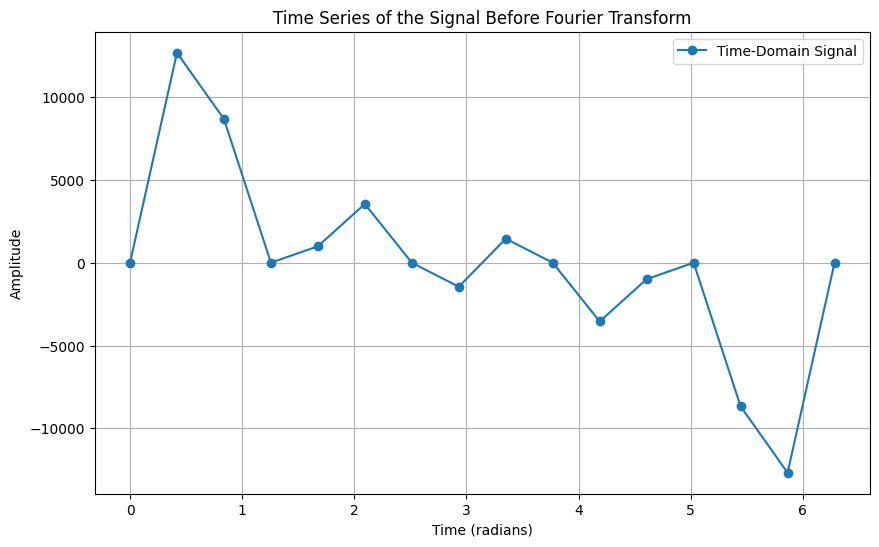

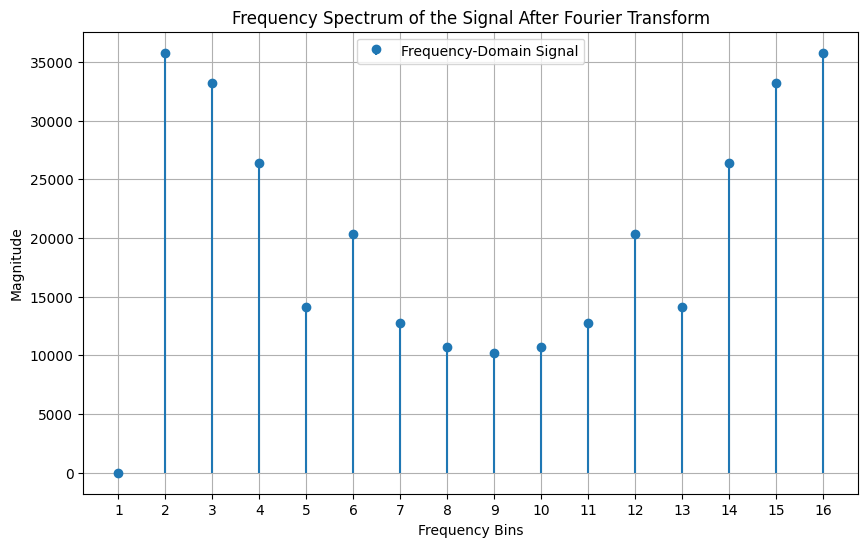

In [102]:
import matplotlib.pyplot as plt

# Plotting the time-domain signal
plt.figure(figsize=(10, 6))
plt.plot(time, scaled_inputs, marker='o', label='Time-Domain Signal')
plt.title('Time Series of the Signal Before Fourier Transform')
plt.xlabel('Time (radians)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


# Compute the magnitude of the FFT results for proper visualization
# bin_indices = np.arange(1, 16 + 1)  # Create frequency bin indices from 1 to 16
magnitudes = np.abs(fourier)  # Magnitudes of FFT results

# Plotting the frequency-domain signal
plt.figure(figsize=(10, 6))
plt.stem(np.arange(1, 16 + 1), magnitudes, basefmt=" ", markerfmt="o", label='Frequency-Domain Signal')
plt.title('Frequency Spectrum of the Signal After Fourier Transform')
plt.xlabel('Frequency Bins')
plt.ylabel('Magnitude')
plt.xticks(np.arange(1, 16 + 1))  # Set x-axis ticks to align with bin indices
plt.grid(True)
plt.legend()
plt.show()


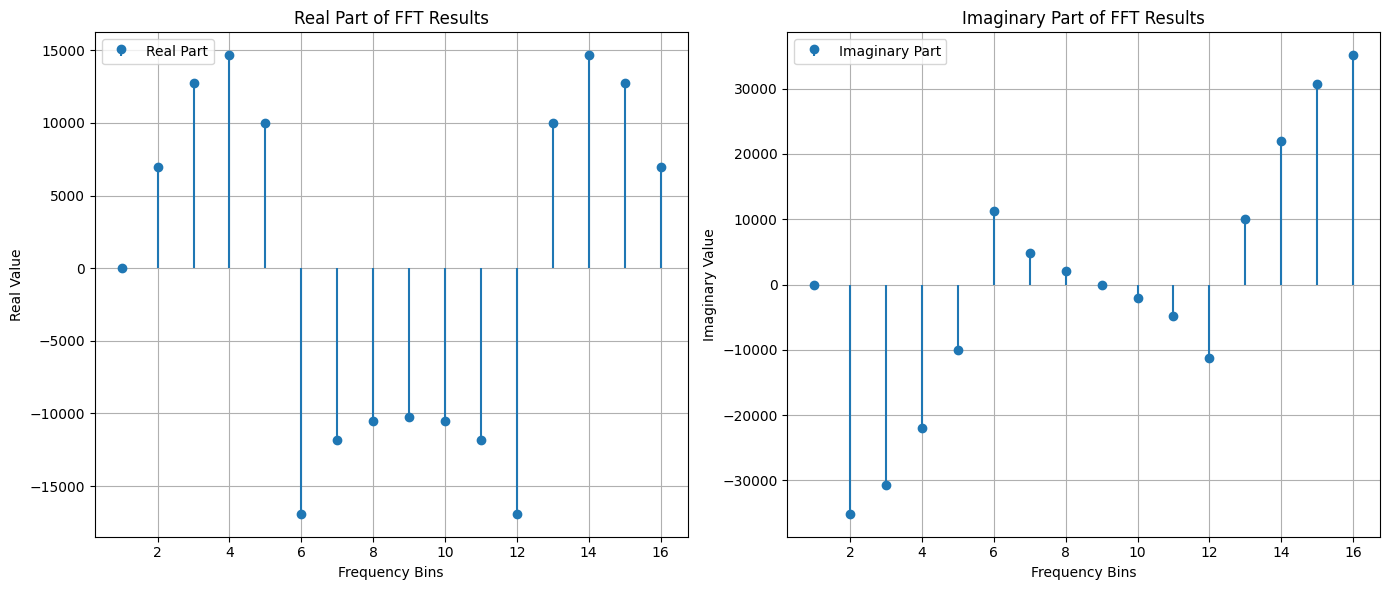

In [87]:
# Create subplots for the real and imaginary parts of the FFT results
real_parts = [value.real for value in fourier]
imaginary_parts = [value.imag for value in fourier]

# Define the figure and axes for side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot the real part of the FFT results
axs[0].stem(np.arange(1, 16 + 1), real_parts, basefmt=" ", markerfmt="o", label='Real Part')
axs[0].set_title('Real Part of FFT Results')
axs[0].set_xlabel('Frequency Bins')
axs[0].set_ylabel('Real Value')
axs[0].grid(True)
axs[0].legend()

# Plot the imaginary part of the FFT results
axs[1].stem(np.arange(1, 16 + 1), imaginary_parts, basefmt=" ", markerfmt="o", label='Imaginary Part')
axs[1].set_title('Imaginary Part of FFT Results')
axs[1].set_xlabel('Frequency Bins')
axs[1].set_ylabel('Imaginary Value')
axs[1].grid(True)
axs[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
